In [139]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nb
import numpy as np

In [40]:
data_dir = "/home/julia/projects/lc/nifti/visual_clem_nifti/CL181030fmrssouris3/CL181030fmrssouris3_4/"
added_file = data_dir + "data_added_tsnr.nii.gz"
sos_file = data_dir + "data_sos_tsnr.nii.gz"
real_file = data_dir + "data_real_tsnr.nii.gz"
mask_file = data_dir + "mask.nii.gz"

In [46]:
tsnr_real = nb.load(real_file).get_data()
tsnr_added = nb.load(added_file).get_data()
tsnr_sos = nb.load(sos_file).get_data()
mask = nb.load(mask_file).get_data()

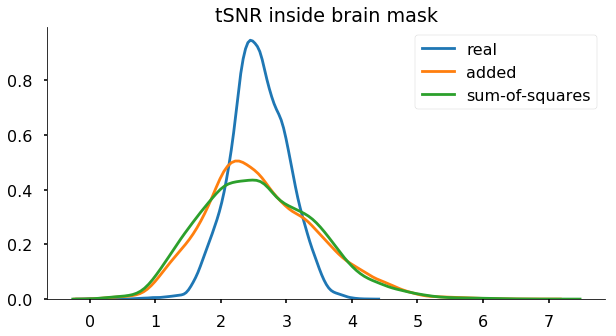

In [49]:
sns.set_context('poster')
fig=plt.figure(figsize=(10,5))
sns.kdeplot(tsnr_real[np.where(mask==1)].flatten(), label='real')
sns.kdeplot(tsnr_added[np.where(mask==1)].flatten(), label='added')
sns.kdeplot(tsnr_sos[np.where(mask==1)].flatten(), label='sum-of-squares')
plt.legend()
plt.title('tSNR inside brain mask')
sns.despine()

In [54]:
print(np.mean(tsnr_real[np.where(mask==1)]))
print(np.mean(tsnr_added[np.where(mask==1)]))
print(np.mean(tsnr_sos[np.where(mask==1)]))

2.5790143262
2.62268184558
2.59868399698


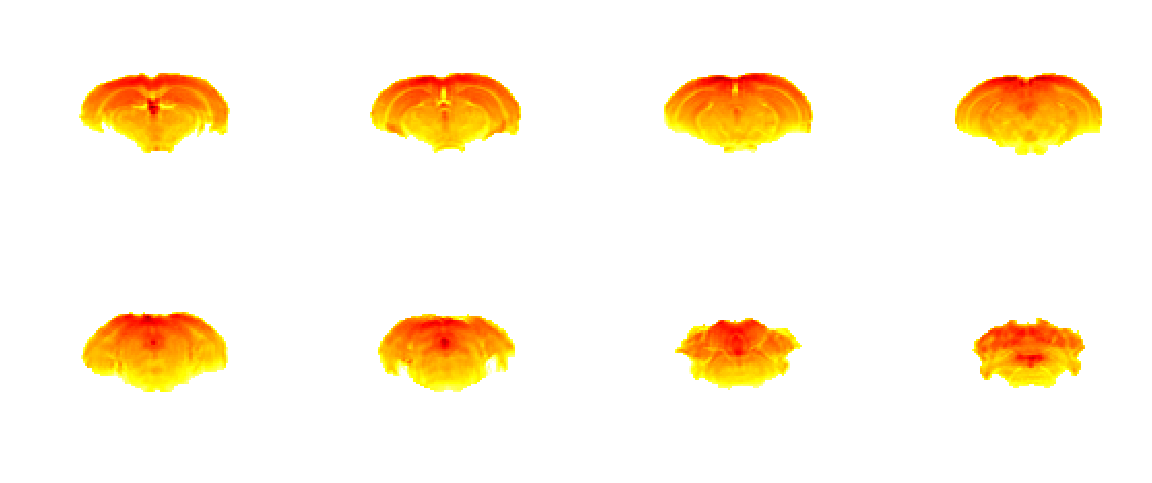

In [93]:
fig = plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(tsnr_real.shape[2]):
    fig.add_subplot(2,4,i+1)
    plt.imshow(tsnr_real[:,:,i].T, cmap='hot_r', vmin=1, vmax=5);
    plt.axis('off');

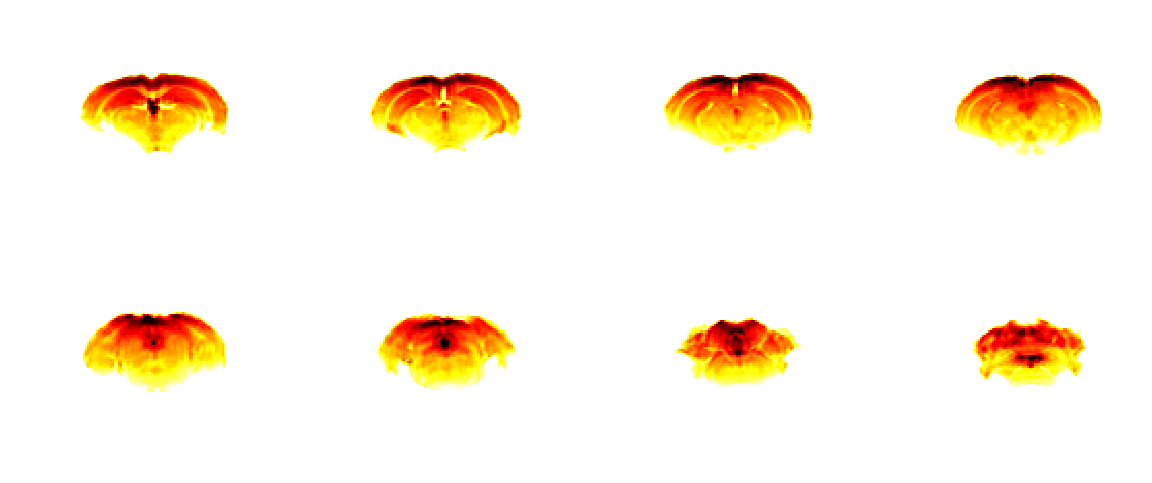

In [94]:
fig = plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(tsnr_real.shape[2]):
    fig.add_subplot(2,4,i+1)
    plt.imshow(tsnr_added[:,:,i].T, cmap='hot_r', vmin=1, vmax=5);
    plt.axis('off');

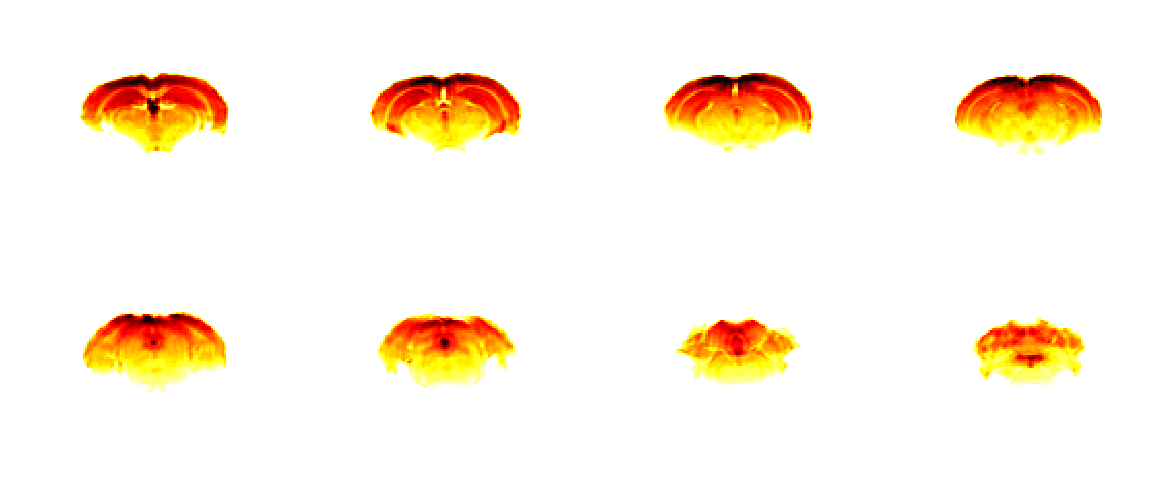

In [95]:
fig = plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(tsnr_real.shape[2]):
    fig.add_subplot(2,4,i+1)
    plt.imshow(tsnr_sos[:,:,i].T, cmap='hot_r', vmin=1, vmax=5);
    plt.axis('off');

Text(0.5,1,'Sum-of-squares')

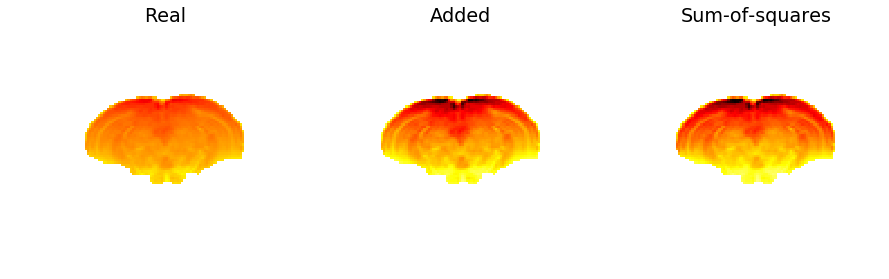

In [108]:
fig = plt.figure(figsize=(15,4))

plt.tight_layout()
fig.add_subplot(1,3,1)
plt.imshow(tsnr_real[:,:,3].T, cmap='hot_r', vmin=0, vmax=6);
plt.axis('off')
plt.title('Real')

fig.add_subplot(1,3,2)
plt.imshow(tsnr_added[:,:,3].T, cmap='hot_r', vmin=0, vmax=6);
plt.axis('off')
plt.title('Added')

fig.add_subplot(1,3,3)
plt.imshow(tsnr_sos[:,:,3].T, cmap='hot_r', vmin=0, vmax=6);
plt.axis('off')
plt.title('Sum-of-squares')

In [111]:
added_ts_file = data_dir + "data_added.nii.gz"
sos_ts_file = data_dir + "data_sos.nii.gz"
real_ts_file = data_dir + "data_real.nii.gz"

In [112]:
real_ts = nb.load(real_ts_file).get_data()
added_ts = nb.load(added_ts_file).get_data()
sos_ts = nb.load(sos_ts_file).get_data()

<IPython.core.display.Javascript object>


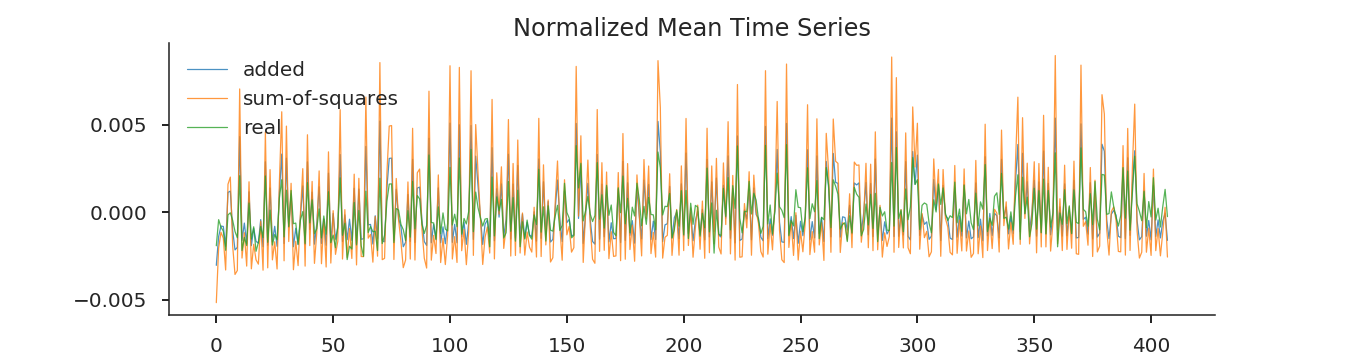

In [147]:
%matplotlib notebook

plt.show()
fig=plt.figure(figsize=(15,4))
plt.plot((np.average(np.average(np.average(added_ts, axis=0), axis=0),axis=0)-np.mean(added_ts))/np.var(added_ts), label='added', linewidth=1, alpha=0.8)
plt.plot((np.average(np.average(np.average(sos_ts, axis=0), axis=0),axis=0)-np.mean(sos_ts))/np.var(sos_ts), label='sum-of-squares', linewidth=1,alpha=0.8)
plt.plot(-(np.average(np.average(np.average(real_ts, axis=0), axis=0),axis=0)-np.mean(real_ts))/np.var(real_ts), label='real', linewidth=1,alpha=0.8)
plt.legend()
plt.title("Normalized Mean Time Series")
sns.despine()
plt.show()